<a href="https://colab.research.google.com/github/Sabuj-Kumar/ShootingGame/blob/main/Sentiment_Analysis_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from google.colab import files
file = files.upload()


Saving DistanceLearning.csv to DistanceLearning.csv


In [ ]:
data = pd.read_csv('DistanceLearning.csv')
data #onlinelearning_dataset.csv
#covid19_dataset.csv
#DistanceLearning.csv

,Tweets
0,Love hearing from fellow students about transi...
1,Transitioning to online learning was definitel...
2,"Online learning certainly isn’t the best, but ..."
3,For me offline class is more in learning than ...
4,Offline classes are always best
...,...
874,As a former teacher that did the second half o...
875,Kids aren’t smart enough to learn on their own...
876,Duh. Keep the school's closed and you get a bu...
877,i did my master's online while working fulltim...


In [ ]:
#create function to get subjectivity and polarity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['Tweets'].apply(getSubjectivity)
data['Polarity'] = data['Tweets'].apply(getPolarity)

data

,Tweets,Subjectivity,Polarity
0,Love hearing from fellow students about transi...,0.600000,0.625000
1,Transitioning to online learning was definitel...,0.516667,-0.094444
2,"Online learning certainly isn’t the best, but ...",0.357143,0.488095
3,For me offline class is more in learning than ...,0.500000,0.500000
4,Offline classes are always best,0.300000,1.000000
...,...,...,...
874,As a former teacher that did the second half o...,0.432312,0.072123
875,Kids aren’t smart enough to learn on their own...,0.568571,0.162857
876,Duh. Keep the school's closed and you get a bu...,0.266667,-0.166667
877,i did my master's online while working fulltim...,0.000000,0.000000


In [ ]:
# create function Negative,Positive and Nutral

def getanalysis(count):
  if count < 0:
    return 'Negative'
  elif count == 0:
    return 'Nutral'
  else:
    return 'Positive'

data['Analysis'] = data['Polarity'].apply(getanalysis)

data

,Tweets,Subjectivity,Polarity,Analysis
0,Love hearing from fellow students about transi...,0.600000,0.625000,Positive
1,Transitioning to online learning was definitel...,0.516667,-0.094444,Negative
2,"Online learning certainly isn’t the best, but ...",0.357143,0.488095,Positive
3,For me offline class is more in learning than ...,0.500000,0.500000,Positive
4,Offline classes are always best,0.300000,1.000000,Positive
...,...,...,...,...
874,As a former teacher that did the second half o...,0.432312,0.072123,Positive
875,Kids aren’t smart enough to learn on their own...,0.568571,0.162857,Positive
876,Duh. Keep the school's closed and you get a bu...,0.266667,-0.166667,Negative
877,i did my master's online while working fulltim...,0.000000,0.000000,Nutral


In [ ]:
#print all positive tweets

j = 1
num = data.sort_values(by=['Polarity'])
for i in range(0,num.shape[0]):
  if (num['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+num['Tweets'][i])
    print()
    j = j + 1




1) Love hearing from fellow students about transitioning to online learning. We're all in this together!

2) Online learning certainly isn’t the best, but it does have a lot of benefits. Thanks for the video!

3) For me offline class is more in learning than online class.

4) Offline classes are always best

5) Blaming e-learning when the real problem that he is trying to explain is the inability of teachers to "storytell" in the way they teach.

6) Honestly a lot of teachers/professors still teach us even through virtual class by telling stories, examples of their or other's experience.etc. May God Bless them ❤️.

7) I had a great chemistry teacher who would open his lectures up with stories and history around what we were going to learn in chemistry! It made me so excited to then learn all of the formulas etc. I was doing something that others before me had to figure out and apply to the real world. I had a math teacher who did the same. These are two subjects we don’t usually think 

In [ ]:
#print all Negative tweets

j = 1
num1 = data.sort_values(by=['Polarity'],ascending='False')
for i in range(0,num1.shape[0]):
  if (num1['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+num1['Tweets'][i])
    print()
    j = j + 1

1) Transitioning to online learning was definitely tough, but I am really growing to like it.

2) As long as people want money, nothing will change, schools will remain as dull human generators

3) Watched a video from Carl sagan and he spoke of how young children enter school full of wonder and questions and graduate with these qualities gone. Something seriously wrong with our school system

4) Not just elearning education in general have that problem. That's why teachers still matter. We can't tell stories if we are expected to follow and plan minutes by minutes prescription of content dumping.

5) Well not all e-learning is the same it’s very dependent on other things like teachers and subject.

6) Trust me, I work in tech. I have sat through 30 minute youtube tutorials to find 5 seconds of content that I needed to see to show a missing detail in some complex process. Even if the video is as boring as sin. You have to watch it like a hawk on the off chance you can pick op a detail 

<function matplotlib.pyplot.show>

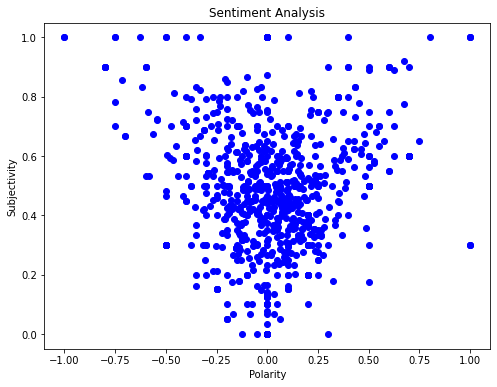

In [ ]:
# plot Polarity And Subjectivity
plt.figure(figsize=(8,6))

for i in range(0,data.shape[0]):
  plt.scatter(data['Polarity'][i],data['Subjectivity'][ i ],color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [ ]:
#get percentage of Positive tweets

ptwts = data[data.Analysis == 'Positive']
ptwts = ptwts['Tweets']

round((ptwts.shape[ 0 ] / data.shape[ 0 ]) * 100, 2)

35.46

In [ ]:
#get percentage of Nagetive tweets

ntwts = data[data.Analysis == 'Negative']
ntwts = ntwts['Tweets']

round((ntwts.shape[ 0 ] / data.shape[ 0 ]) * 100, 2)

15.43

In [ ]:
#get percentage of Nutral tweets

nutwts = data[data.Analysis == 'Nutral']
nutwts = nutwts['Tweets']

round((nutwts.shape[ 0 ] / data.shape[ 0 ]) * 100, 2)

49.11

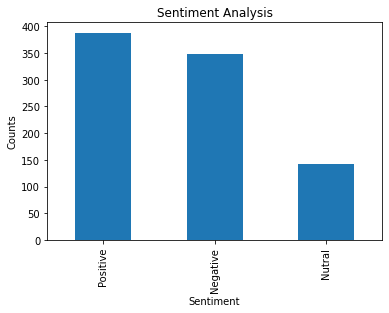

In [ ]:
#Value count show

data['Analysis'].value_counts()

#plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()